<h1> Amazon Apparel Recommendations Engine</h1>

Skills: Python, text processing, image processing

# Problem Statement

Recommendation engine which suggests  similar products to the given product in any e-commerce websites ex. Amazon.com, myntra.com etc.

Ex.Recommend similar apparel products using product descriptions and Images

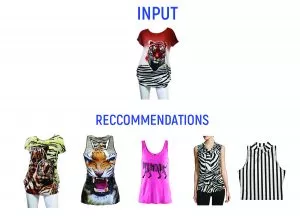

In this project I will build a recommendation engine that suggests relevant apparels to the given apparel.The recommendation engine, uses information about 1,80,000 products and  each product will have multiple features named.

1.Title of the product <br> 
2.Brand of the product <br>
3.Color of the product <br>
4.Type of the product <br>
5.Image of the apparel <br>

Data Source: Amazon.com



### Exploring the data
Let’s start with importing the necessary libaries, reading the data, and analyze the dataset.

In [1]:
#import all the necessary packages.

import numpy as np
import pandas as pd
from collections import Counter

#Load the amazon tops_fashion json file which consists of all information about the products
data = pd.read_json('tops_fashion.json')

# Success - Display the first record
display(data.head(n=1))

,asin,author,availability,availability_type,brand,color,editorial_reivew,editorial_review,formatted_price,large_image_url,manufacturer,medium_image_url,model,product_type_name,publisher,reviews,sku,small_image_url,title
0,B016I2TS4W,None,None,None,FNC7C,None,NaN,Minions Como Superheroes Ironman Women's O Nec...,None,https://images-na.ssl-images-amazon.com/images...,None,https://images-na.ssl-images-amazon.com/images...,None,SHIRT,None,"[False, https://www.amazon.com/reviews/iframe?...",None,https://images-na.ssl-images-amazon.com/images...,Minions Como Superheroes Ironman Long Sleeve R...


In [2]:
print ('Number of data points : ', data.shape[0], \
       '\nNumber of features/variables:', data.shape[1],'\n\n')

#Checking out the datatypes of the features
data.info()

Number of data points :  183138 
Number of features/variables: 19 


<class 'pandas.core.frame.DataFrame'>
Int64Index: 183138 entries, 0 to 183137
Data columns (total 19 columns):
asin                 183138 non-null object
author               1 non-null object
availability         24532 non-null object
availability_type    24559 non-null object
brand                182987 non-null object
color                64956 non-null object
editorial_reivew     180380 non-null object
editorial_review     2758 non-null object
formatted_price      28395 non-null object
large_image_url      183138 non-null object
manufacturer         42899 non-null object
medium_image_url     183138 non-null object
model                62370 non-null object
product_type_name    183138 non-null object
publisher            42899 non-null object
reviews              183138 non-null object
sku                  363 non-null object
small_image_url      183138 non-null object
title                183138 non-null object
d

#### A simple investigation of the dataset can determine many irrlevent features in dataset such as author, availability .

Of these 19 features, I am using only 7 features.
    1. asin  ( Amazon standard identification number)
    2. brand ( brand to which the product belongs to )
    3. color ( Color information of apparel, it can contain many colors as   a value ex: red and black stripes ) 
    4. medium_image_url  ( url of the image )
    5. product_type_name (type of the apperal, ex: SHIRT/TSHIRT )
    6. title (title of the product.)
    7. formatted_price (price of the product)
    
So,Let's shrink our dataset to the only following features.

In [3]:
data = data[['asin', 'brand', 'color', 'medium_image_url', 'product_type_name', 'title', 'formatted_price']]

After shrinking no of features in dataset our dataset have following fetures. Heare I am printing top 3 records of dataset.

In [4]:
print ('Number of data points : ', data.shape[0], \
       '\nNumber of features:', data.shape[1])
data.head(3) # prints the top 3 rows in the table.

Number of data points :  183138 
Number of features: 7


,asin,brand,color,medium_image_url,product_type_name,title,formatted_price
0,B016I2TS4W,FNC7C,None,https://images-na.ssl-images-amazon.com/images...,SHIRT,Minions Como Superheroes Ironman Long Sleeve R...,None
1,B01N49AI08,FIG Clothing,None,https://images-na.ssl-images-amazon.com/images...,SHIRT,FIG Clothing Womens Izo Tunic,None
2,B01JDPCOHO,FIG Clothing,None,https://images-na.ssl-images-amazon.com/images...,SHIRT,FIG Clothing Womens Won Top,None


## Analyzing various features of the dataset.

####  Basic stats for the feature: product_type_name

In [5]:
# We have total 72 unique type of product_type_names
print(data['product_type_name'].describe())

# 91.62% (167794/183138) of the products are shirts,


count     183138
unique        72
top        SHIRT
freq      167794
Name: product_type_name, dtype: object


So, from above stats we can see that each product have their product name since count is equal to no of records in our dataset. So,there is no any missing value for this feature and there is 72 unique product name in our dataset with most frequent is shirt.<br><br>
Here is name of the different product.

In [6]:
# names of different product types
print(data['product_type_name'].unique())

['SHIRT' 'SWEATER' 'APPAREL' 'OUTDOOR_RECREATION_PRODUCT'
 'BOOKS_1973_AND_LATER' 'PANTS' 'HAT' 'SPORTING_GOODS' 'DRESS' 'UNDERWEAR'
 'SKIRT' 'OUTERWEAR' 'BRA' 'ACCESSORY' 'ART_SUPPLIES' 'SLEEPWEAR'
 'ORCA_SHIRT' 'HANDBAG' 'PET_SUPPLIES' 'SHOES' 'KITCHEN' 'ADULT_COSTUME'
 'HOME_BED_AND_BATH' 'MISC_OTHER' 'BLAZER' 'HEALTH_PERSONAL_CARE'
 'TOYS_AND_GAMES' 'SWIMWEAR' 'CONSUMER_ELECTRONICS' 'SHORTS' 'HOME'
 'AUTO_PART' 'OFFICE_PRODUCTS' 'ETHNIC_WEAR' 'BEAUTY'
 'INSTRUMENT_PARTS_AND_ACCESSORIES' 'POWERSPORTS_PROTECTIVE_GEAR' 'SHIRTS'
 'ABIS_APPAREL' 'AUTO_ACCESSORY' 'NONAPPARELMISC' 'TOOLS' 'BABY_PRODUCT'
 'SOCKSHOSIERY' 'POWERSPORTS_RIDING_SHIRT' 'EYEWEAR' 'SUIT'
 'OUTDOOR_LIVING' 'POWERSPORTS_RIDING_JACKET' 'HARDWARE' 'SAFETY_SUPPLY'
 'ABIS_DVD' 'VIDEO_DVD' 'GOLF_CLUB' 'MUSIC_POPULAR_VINYL'
 'HOME_FURNITURE_AND_DECOR' 'TABLET_COMPUTER' 'GUILD_ACCESSORIES'
 'ABIS_SPORTS' 'ART_AND_CRAFT_SUPPLY' 'BAG' 'MECHANICAL_COMPONENTS'
 'SOUND_AND_RECORDING_EQUIPMENT' 'COMPUTER_COMPONENT' 'JEWELRY'
 'B

In [7]:
# find the 10 most frequent product_type_names.
product_type_count = Counter(list(data['product_type_name']))
product_type_count.most_common(10)

[('SHIRT', 167794),
 ('APPAREL', 3549),
 ('BOOKS_1973_AND_LATER', 3336),
 ('DRESS', 1584),
 ('SPORTING_GOODS', 1281),
 ('SWEATER', 837),
 ('OUTERWEAR', 796),
 ('OUTDOOR_RECREATION_PRODUCT', 729),
 ('ACCESSORY', 636),
 ('UNDERWEAR', 425)]

####  Basic stats for the feature: brand


In [8]:
print(data['brand'].describe())

count     182987
unique     10577
top         Zago
freq         223
Name: brand, dtype: object


Here in brand features there is missing valuse for some products(record) since count is only 182987 while total no of records is 183138.<br><br>
So, No of missing values = 183138 - 182987 = 151.<br>
And there is 10577 unique brand in dataset with Most frequent one is Zago.

In [9]:
#find the 10 most frequent brand
brand_count = Counter(list(data['brand']))
brand_count.most_common(10)

[('Zago', 223),
 ('XQS', 222),
 ('Yayun', 215),
 ('YUNY', 198),
 ('XiaoTianXin-women clothes', 193),
 ('Generic', 192),
 ('Boohoo', 190),
 ('Alion', 188),
 ('Abetteric', 187),
 ('TheMogan', 187)]

####  Basic stats for the feature: color

In [10]:
print(data['color'].describe())

count     64956
unique     7380
top       Black
freq      13207
Name: color, dtype: object


Only 64956 products have their color information.<br>
So, No of missing values = 183138-64956 = 118182.<br>
Only 35.4 % products have their color information.

In [11]:
#find the 10 most frequent color
color_count = Counter(list(data['color']))
color_count.most_common(10)

[(None, 118182),
 ('Black', 13207),
 ('White', 8616),
 ('Blue', 3570),
 ('Red', 2289),
 ('Pink', 1842),
 ('Grey', 1499),
 ('*', 1388),
 ('Green', 1258),
 ('Multi', 1203)]

####  Basic stats for the feature: formatted_price

In [12]:
 print(data['formatted_price'].describe())

count      28395
unique      3135
top       $19.99
freq         945
Name: formatted_price, dtype: object


Only 28,395 (15.5% of whole data) products have price information so there is lot of missing values for price feature in dataset.

In [13]:
#find the 10 most frequent price from dataset.
price_count = Counter(list(data['formatted_price']))
price_count.most_common(10)

[(None, 154743),
 ('$19.99', 945),
 ('$9.99', 749),
 ('$9.50', 601),
 ('$14.99', 472),
 ('$7.50', 463),
 ('$24.99', 414),
 ('$29.99', 370),
 ('$8.99', 343),
 ('$9.01', 336)]

#### Basic stats for the feature: title


In [14]:
print(data['title'].describe())

count                                                183138
unique                                               175985
top       Nakoda Cotton Self Print Straight Kurti For Women
freq                                                     77
Name: title, dtype: object


All of the products have a title feature in the dataset we can see with above outputs.<br>
<br>
Python have pickle files facilites in which we can save our data at any point of time. Since we have reduced the feature in dataset so we can save our dataset in pickle folder such that if we stuck at any point we can take directly data from pickle folder so that we don't need to repeat the all step again.

In [15]:
data.to_pickle('pickels/180k_apparel_data')